# Regresión Logística vs Árbol de decisión


In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "classificacion_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [4]:
import pandas as pd
penguins = pd.read_csv("data/penguins_pre.csv")

In [5]:
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,target,FEMALE,MALE,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0.0,0.0,1.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,1.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,0.0,1.0,0.0,0.0,0.0,1.0
3,36.7,19.3,193.0,3450.0,0.0,0.0,1.0,0.0,0.0,1.0
4,39.3,20.6,190.0,3650.0,0.0,1.0,0.0,0.0,0.0,1.0


In [6]:
penguins.drop(columns=["MALE", "Biscoe"], inplace=True)

In [7]:
X = penguins.drop(["target"], axis=1)
y = penguins["target"]


In [8]:
# Hacer una función con todo y probar diversos arboles StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

In [21]:
# Entrenar regresión logistica
lr = LogisticRegression(max_iter=10000, tol=0.001, random_state=42)

In [22]:
# Interpretar coeficientes
lr.fit(train_set, train_y_set)

LogisticRegression(max_iter=10000, random_state=42, tol=0.001)

In [23]:
train_set.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,Dream,Torgersen
177,54.2,20.8,201.0,4300.0,0.0,1.0,0.0
117,41.4,18.5,202.0,3875.0,0.0,0.0,1.0
268,45.0,15.4,220.0,5050.0,1.0,0.0,0.0
17,35.9,19.2,189.0,3800.0,1.0,0.0,0.0
185,53.5,19.9,205.0,4500.0,0.0,1.0,0.0


In [25]:
lr.coef_

array([[-5.60301578e-01,  9.70843697e-01,  5.23363675e-02,
        -5.60327461e-04, -2.42240579e-01, -3.99947745e-01,
         5.33787921e-01],
       [ 2.39877351e-01,  1.01906803e-01, -4.32605606e-02,
        -1.13276160e-03,  2.04941379e-01,  1.90378916e+00,
        -2.98888795e-01],
       [ 3.20424227e-01, -1.07275050e+00, -9.07580683e-03,
         1.69308906e-03,  3.72992003e-02, -1.50384142e+00,
        -2.34899125e-01]])

In [26]:
lr.intercept_

array([ 0.31888753, -0.18604417, -0.13284336])

In [27]:
# Predecir el primer elemento del test y comprobar si es correcto
lr.predict(test_set[:1])

array([1.])

In [32]:
test_y_set[:1]

165    1.0
Name: target, dtype: float64

In [33]:
# método predict vs predict_proba
lr.predict_proba(test_set[:1])

array([[0.01255201, 0.83108034, 0.15636765]])

In [34]:
lr.predict_proba(test_set[:1]).sum()

1.0000000000000002

In [36]:
# Entrenar modelo
tree_cls = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)
tree_cls.fit(train_set, train_y_set)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)

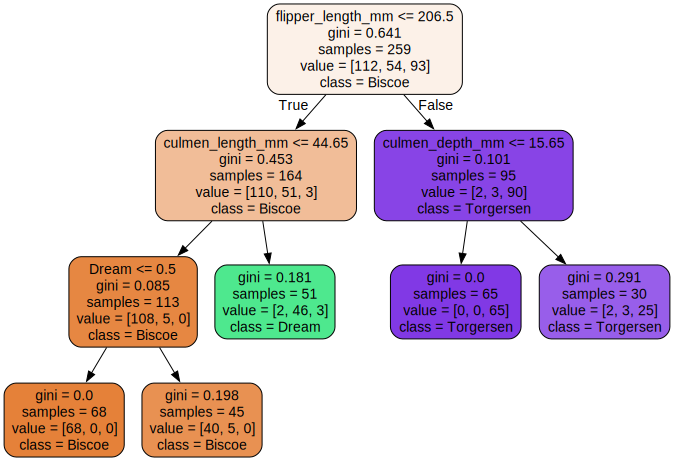

In [37]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_cls,
    out_file=str(IMAGES_PATH / "classificacion_tree.dot"),
    feature_names=train_set.columns,
    class_names = [ "Biscoe","Dream", "Torgersen"],
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "classificacion_tree.dot")

In [278]:
# Interpretar gráfico

In [38]:
# Hacer una predicción del primer elemento del test y comprobar
tree_cls.predict(test_set[:1])

array([1.])

In [39]:
test_y_set[:1]

165    1.0
Name: target, dtype: float64

In [40]:
# método predict vs predict_proba
tree_cls.predict_proba(test_set[:1])

array([[0.03921569, 0.90196078, 0.05882353]])

In [41]:
tree_cls.predict_log_proba(test_set[:1])

array([[-3.23867845, -0.10318424, -2.83321334]])

In [43]:
# Comparar el error train y test
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report, recall_score, precision_score


0.9420849420849421

In [44]:
print(accuracy_score(train_y_set, tree_cls.predict(train_set)))
print(accuracy_score(test_y_set, tree_cls.predict(test_set)))

0.9420849420849421
0.8615384615384616


In [46]:
print(multilabel_confusion_matrix(train_y_set, tree_cls.predict(train_set)))
print(multilabel_confusion_matrix(test_y_set, tree_cls.predict(test_set)))

[[[142   5]
  [  4 108]]

 [[200   5]
  [  8  46]]

 [[161   5]
  [  3  90]]]
[[[30  7]
  [ 1 27]]

 [[49  2]
  [ 6  8]]

 [[42  0]
  [ 2 21]]]


In [47]:
print(classification_report(train_y_set, tree_cls.predict(train_set), output_dict=True, target_names=["Adelie", "Chinstrap", "Gentoo"]))
print(classification_report(test_y_set, tree_cls.predict(test_set), output_dict=True, target_names=["Adelie", "Chinstrap", "Gentoo"]))

{'Adelie': {'precision': 0.9557522123893806, 'recall': 0.9642857142857143, 'f1-score': 0.96, 'support': 112.0}, 'Chinstrap': {'precision': 0.9019607843137255, 'recall': 0.8518518518518519, 'f1-score': 0.8761904761904762, 'support': 54.0}, 'Gentoo': {'precision': 0.9473684210526315, 'recall': 0.967741935483871, 'f1-score': 0.9574468085106383, 'support': 93.0}, 'accuracy': 0.9420849420849421, 'macro avg': {'precision': 0.9350271392519125, 'recall': 0.9279598338738123, 'f1-score': 0.9312124282337049, 'support': 259.0}, 'weighted avg': {'precision': 0.9415266150519171, 'recall': 0.9420849420849421, 'f1-score': 0.9416094166246143, 'support': 259.0}}
{'Adelie': {'precision': 0.7941176470588235, 'recall': 0.9642857142857143, 'f1-score': 0.8709677419354839, 'support': 28.0}, 'Chinstrap': {'precision': 0.8, 'recall': 0.5714285714285714, 'f1-score': 0.6666666666666666, 'support': 14.0}, 'Gentoo': {'precision': 1.0, 'recall': 0.9130434782608695, 'f1-score': 0.9545454545454546, 'support': 23.0}, '

In [286]:
# ¿Qué pasa si cambiamos la semilla/orden de los datos en cada modelo?


In [49]:
# Comprueba el árbol de decisión sin ningún hiperparámetro
tree_cls = DecisionTreeClassifier()
tree_cls.fit(train_set, train_y_set)

DecisionTreeClassifier()

In [50]:
print(accuracy_score(train_y_set, tree_cls.predict(train_set)))
print(accuracy_score(test_y_set, tree_cls.predict(test_set)))

1.0
0.8769230769230769
